## Description

In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and  The dataset we are going to use is the census income dataset. So the problem we have is a Supervised Binary Classification type.

#### Installing Plotly

In [496]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=32563ef1476a0cff41ded1b6ce280c24f70bcf0761b27eb3d48aaa046290e50e
  Stored in directory: c:\users\anubhav\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [498]:
df = pd.read_csv('train.csv', skipinitialspace=True)
df.head(10)

,Person_Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Step 1: Analysis

In [499]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32561 Columns: 16


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Person_Id       32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  wage_class      32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [501]:
df.dtypes

Person_Id          int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [502]:
df.isnull().sum()

Person_Id         0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [503]:
## check for "?" in dataset
round((df.isin(['?']).sum()/df.shape[0])*100,2).astype(str)+' %'

Person_Id          0.0 %
age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.79 %
wage_class         0.0 %
dtype: object

#### Stats Analysis

In [504]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person_Id,32561.0,16281.000000,9399.695394,1.0,8141.0,16281.0,24421.0,32561.0
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [505]:
## checking the vaue counts of label categories
df["wage_class"].value_counts()

<=50K    24720
>50K      7841
Name: wage_class, dtype: int64

#### Observation from above analysis
**The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
and dataset is also not balanced as the dependent feature 'wage_class' contains 24720 values have income less than 50k and 7841 values have income more than 50k.**

## Step 2: Data visualization with target variable

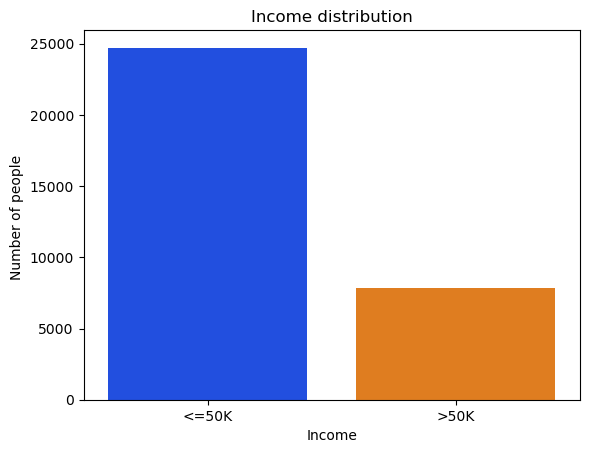

In [506]:
## creating bar graph for wage_class
wage_class=df["wage_class"].value_counts()
sns.barplot(wage_class.index,wage_class.values,palette="bright")
plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Number of people ")
plt.show()

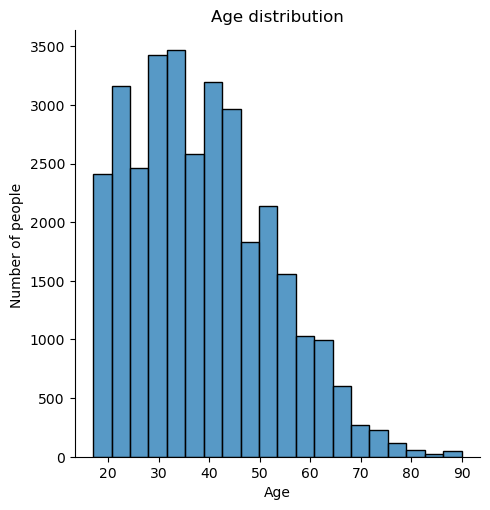

In [507]:
## creating distplot graph for Age
wage_class=df["age"].value_counts()
sns.displot(df["age"],bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of people ")
plt.show()

<AxesSubplot:xlabel='wage_class', ylabel='age'>

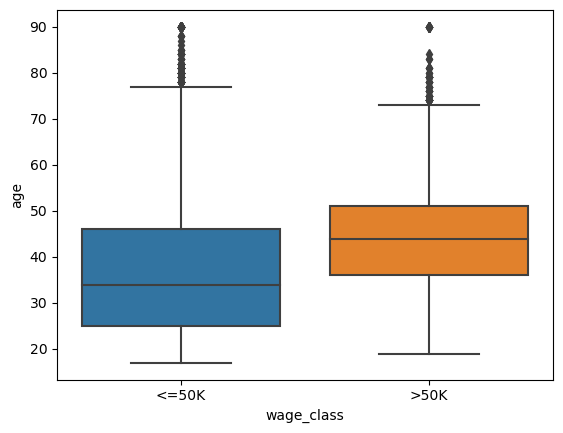

In [508]:
sns.boxplot(y='age',x='wage_class',data=df)

<AxesSubplot:xlabel='wage_class', ylabel='hours_per_week'>

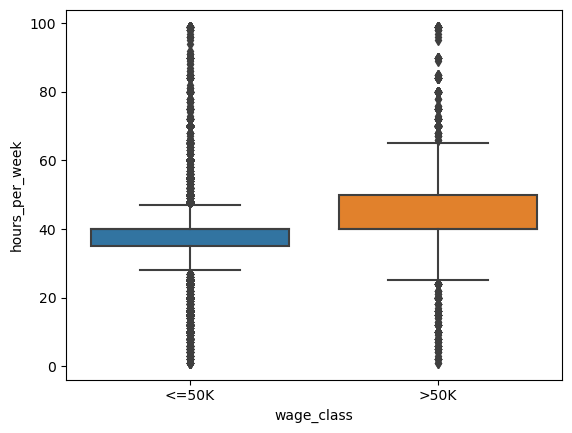

In [509]:
sns.boxplot(y='hours_per_week',x='wage_class',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

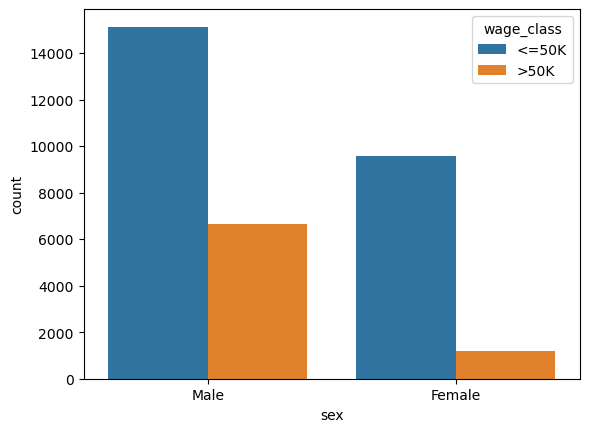

In [510]:
sns.countplot(df['sex'],hue=df['wage_class'])

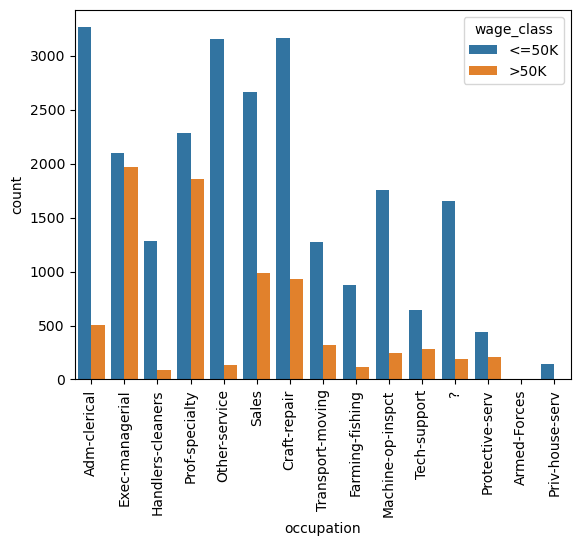

In [511]:
sns.countplot(df['occupation'],hue=df['wage_class']);
plt.xticks(rotation=90);

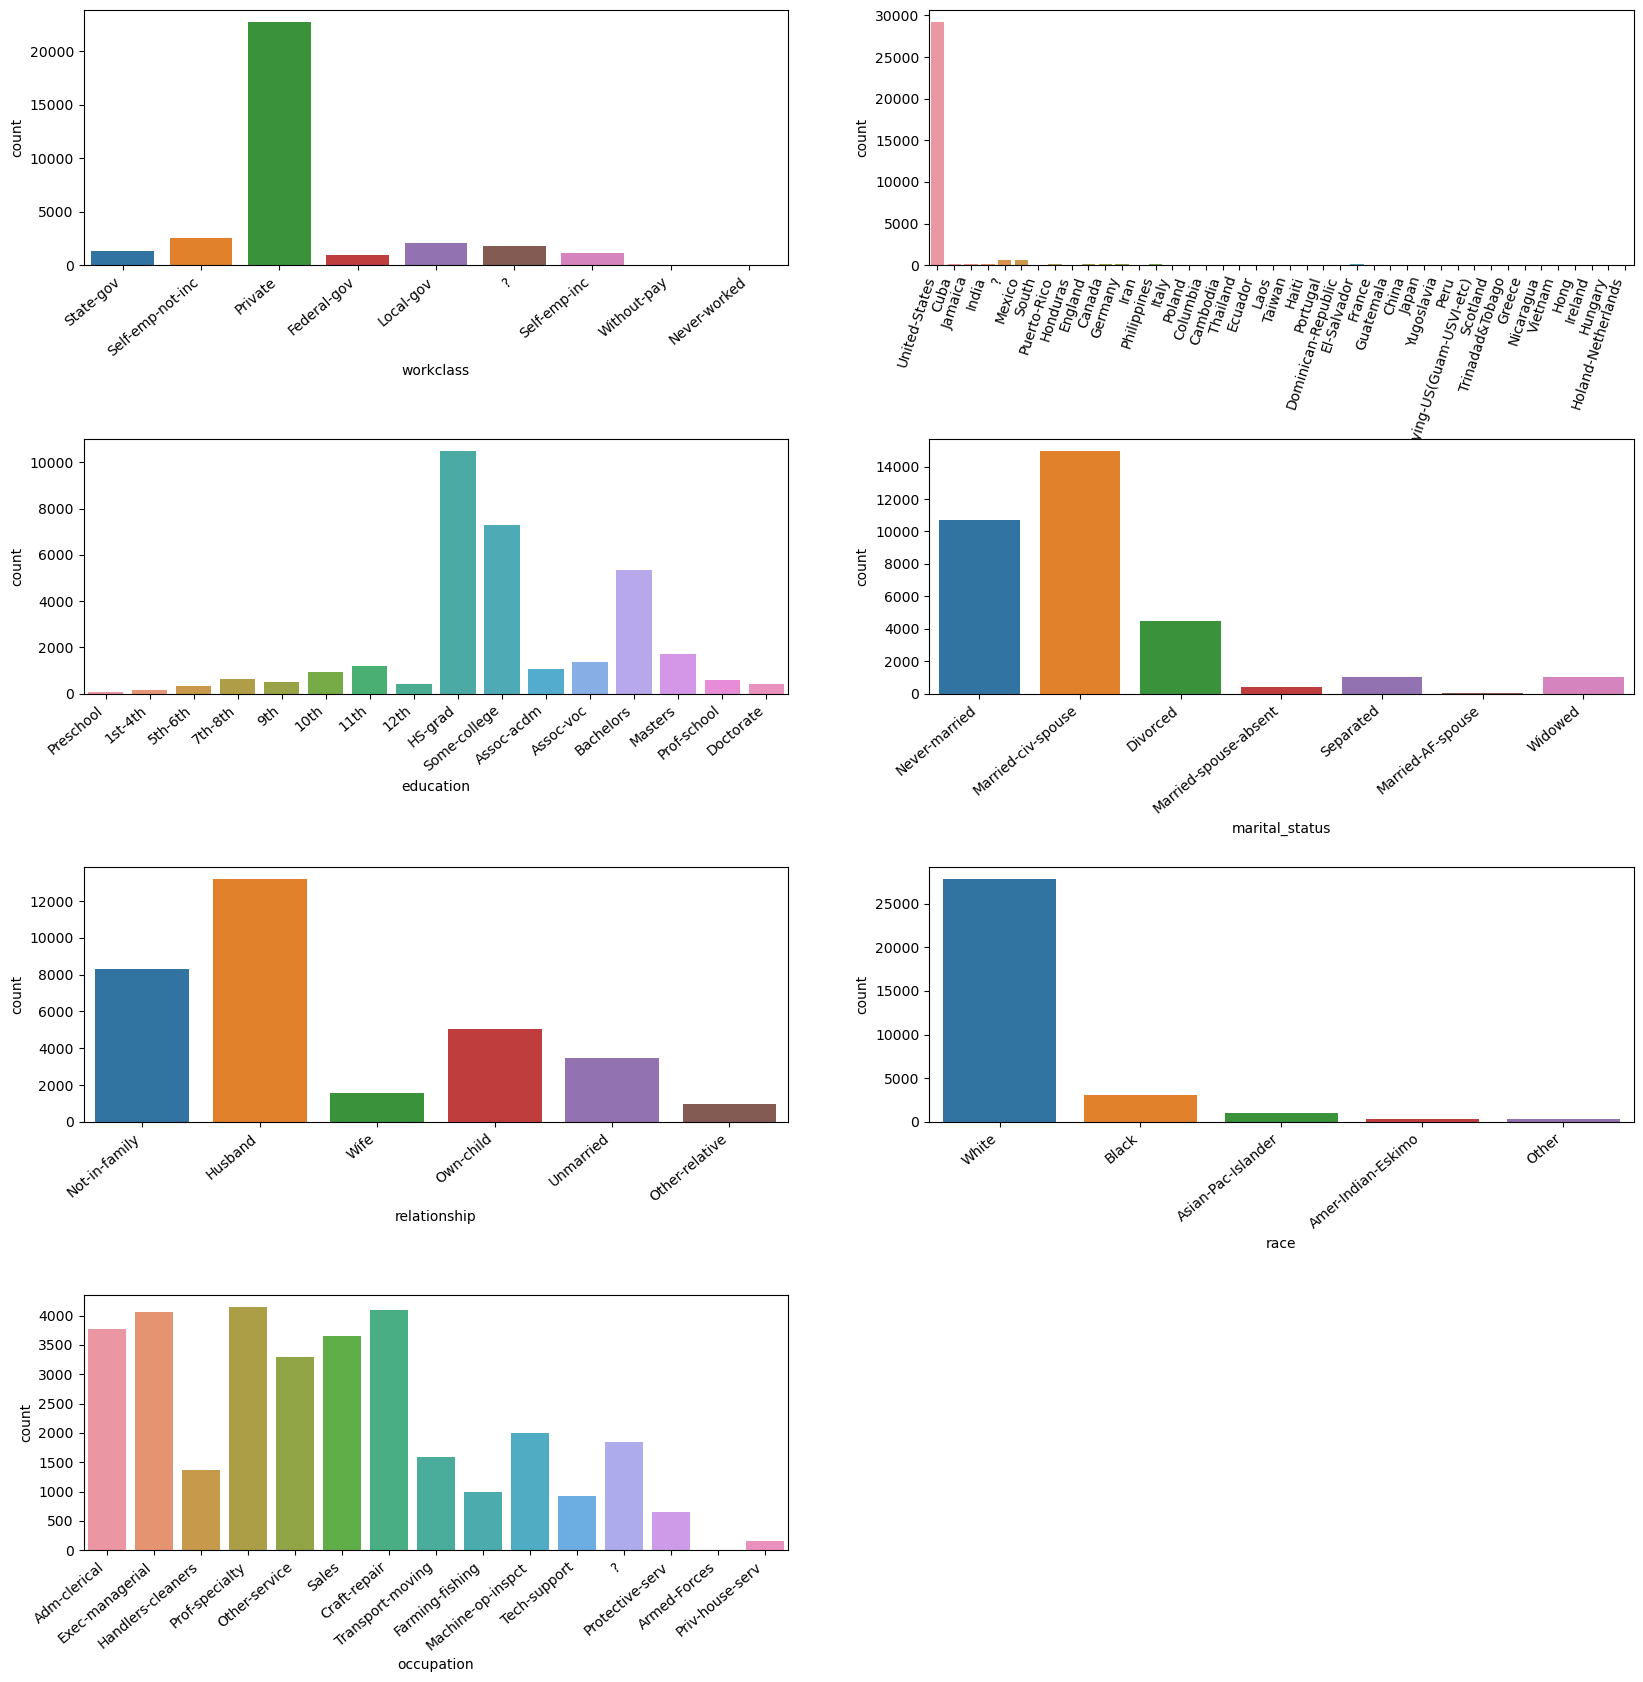

In [512]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(df['workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(df['native_country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ed_plot = sns.countplot(df['education'], order=order, ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(df['marital_status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(df['relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(df['race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(df['occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

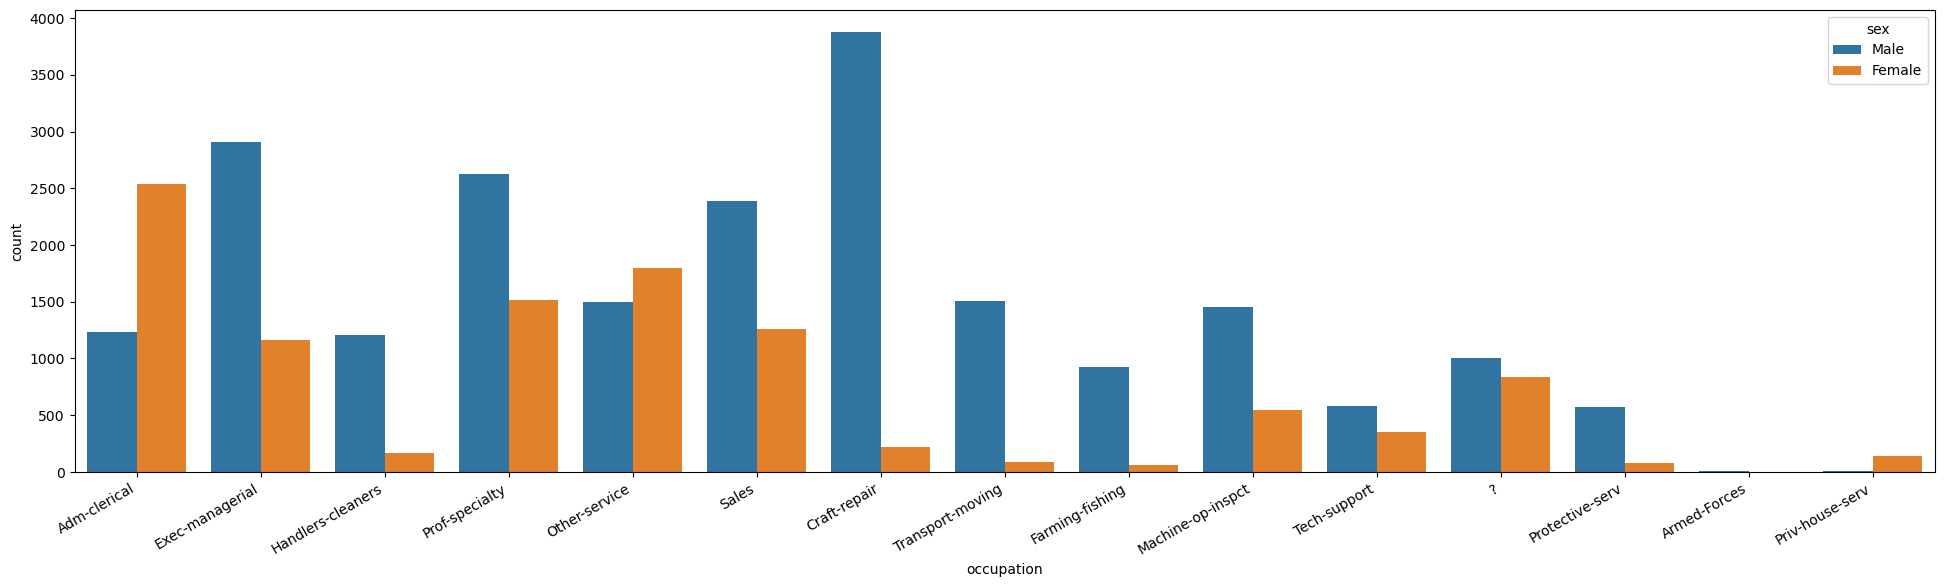

In [513]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df['occupation'], hue=df['sex'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()

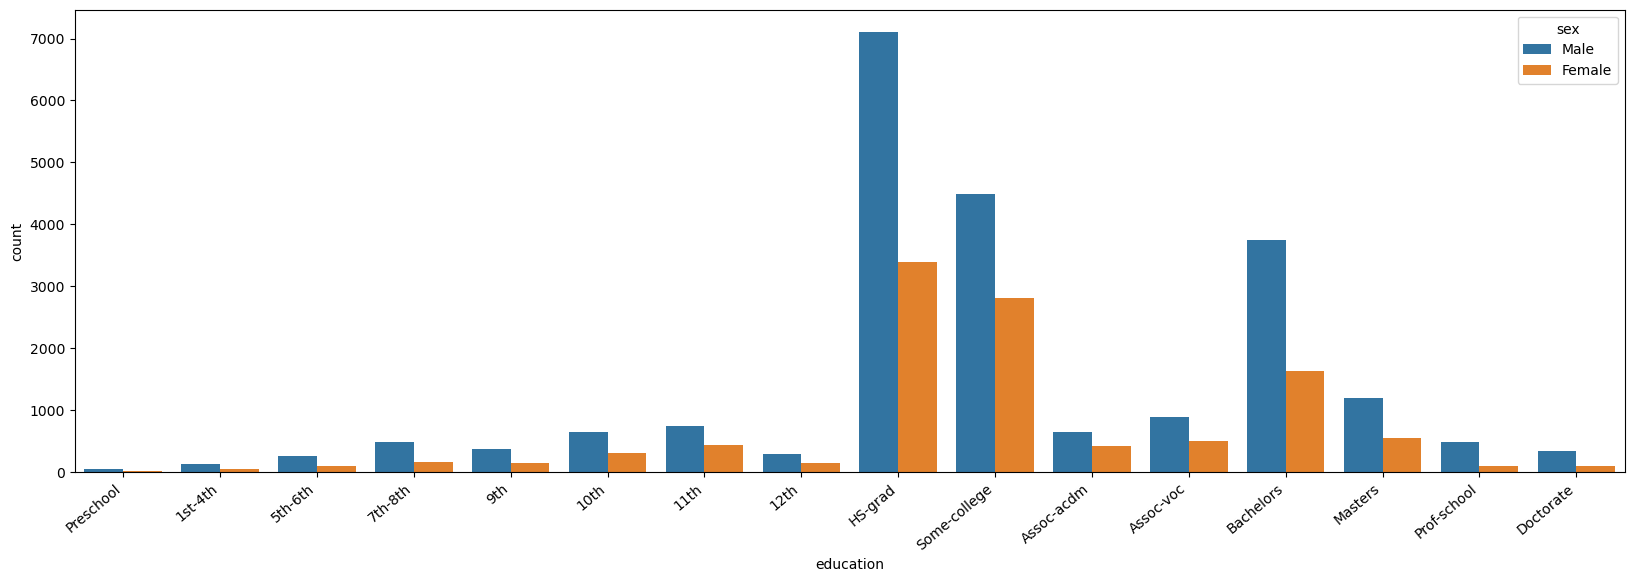

In [514]:
plt.figure(figsize=(20, 6))
ro = sns.countplot(df['education'], hue=df['sex'], order=order)
ro.set_xticklabels(ro.get_xticklabels(), rotation=40, ha="right")
plt.show()

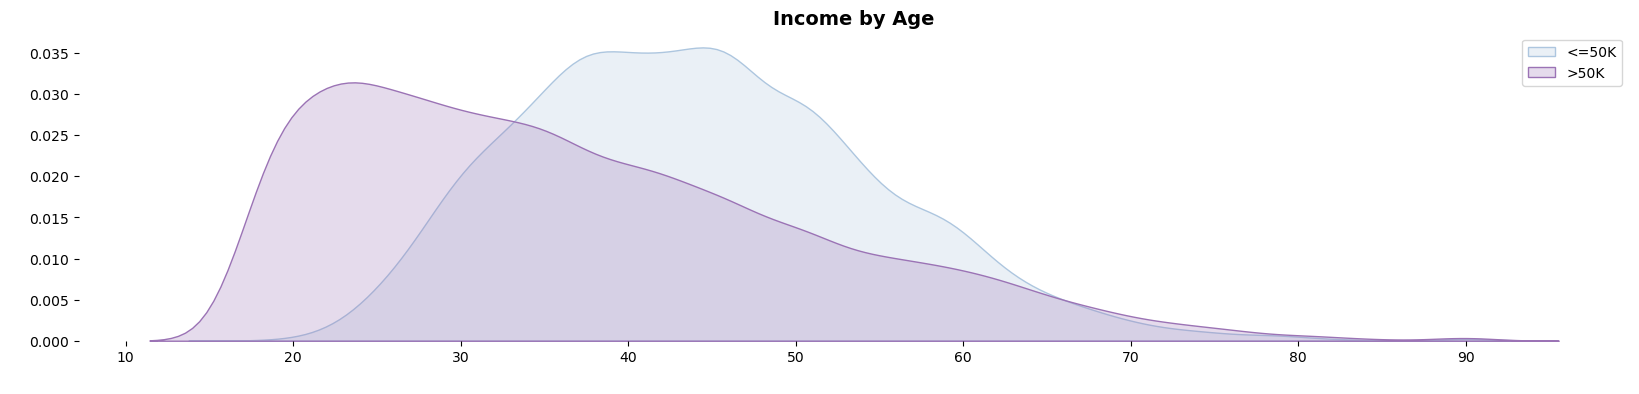

In [515]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)

data_over50k=df[df['wage_class']=='<=50K']
data_less50k= df[df['wage_class']=='>50K']
sns.kdeplot(data_less50k['age'], label = '<=50K', shade=True, color='#ADC6DF', ax=ax1)
sns.kdeplot(data_over50k['age'], label = '>50K', shade=True, color='#9B73B5', ax=ax1)

#Removing lines from the graph
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

#Title
ax1.set_title("Income by Age", loc='center',fontweight='bold',fontsize=14 )
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')
#X-Axis
plt.xticks(np.arange(10,100,10))

#Legend
line_labels = ["<=50K", ">50K"]
ax1.legend(
    loc="upper right",
    labels=line_labels)   

## Feature Engineering

***Contribute by Ankush Kunwar***

In [516]:
df["education"]=df["education"].replace(["Preschool","1st-4th","7th-8th","9th","5th-6th"],"school")
df["education"]=df["education"].replace("HS-grad","High_school")
df["education"]=df["education"].replace("Bachelors","Undergrad")
df["education"]=df["education"].replace("Masters","Grad")
df["education"]=df["education"].replace("Doctorate","Doc")
df["education"]=df["education"].replace(["Assoc-voc","Assoc-acdm","Prof-school","Some-college"],"higher")

In [517]:
df["marital_status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [518]:
df["marital_status"]=df["marital_status"].replace(["Married-civ-spouse","Married-AF-spouse"],"Married")
df["marital_status"]=df["marital_status"].replace(["Divorced","Separated","Married-AF-spouse","Widowed"],"Other")
df["marital_status"]=df["marital_status"].replace("Never-married","Unmarried")

### Multivariate Analysis

In [519]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

In [520]:
df['wage_class'] = le.fit_transform(df['wage_class'])

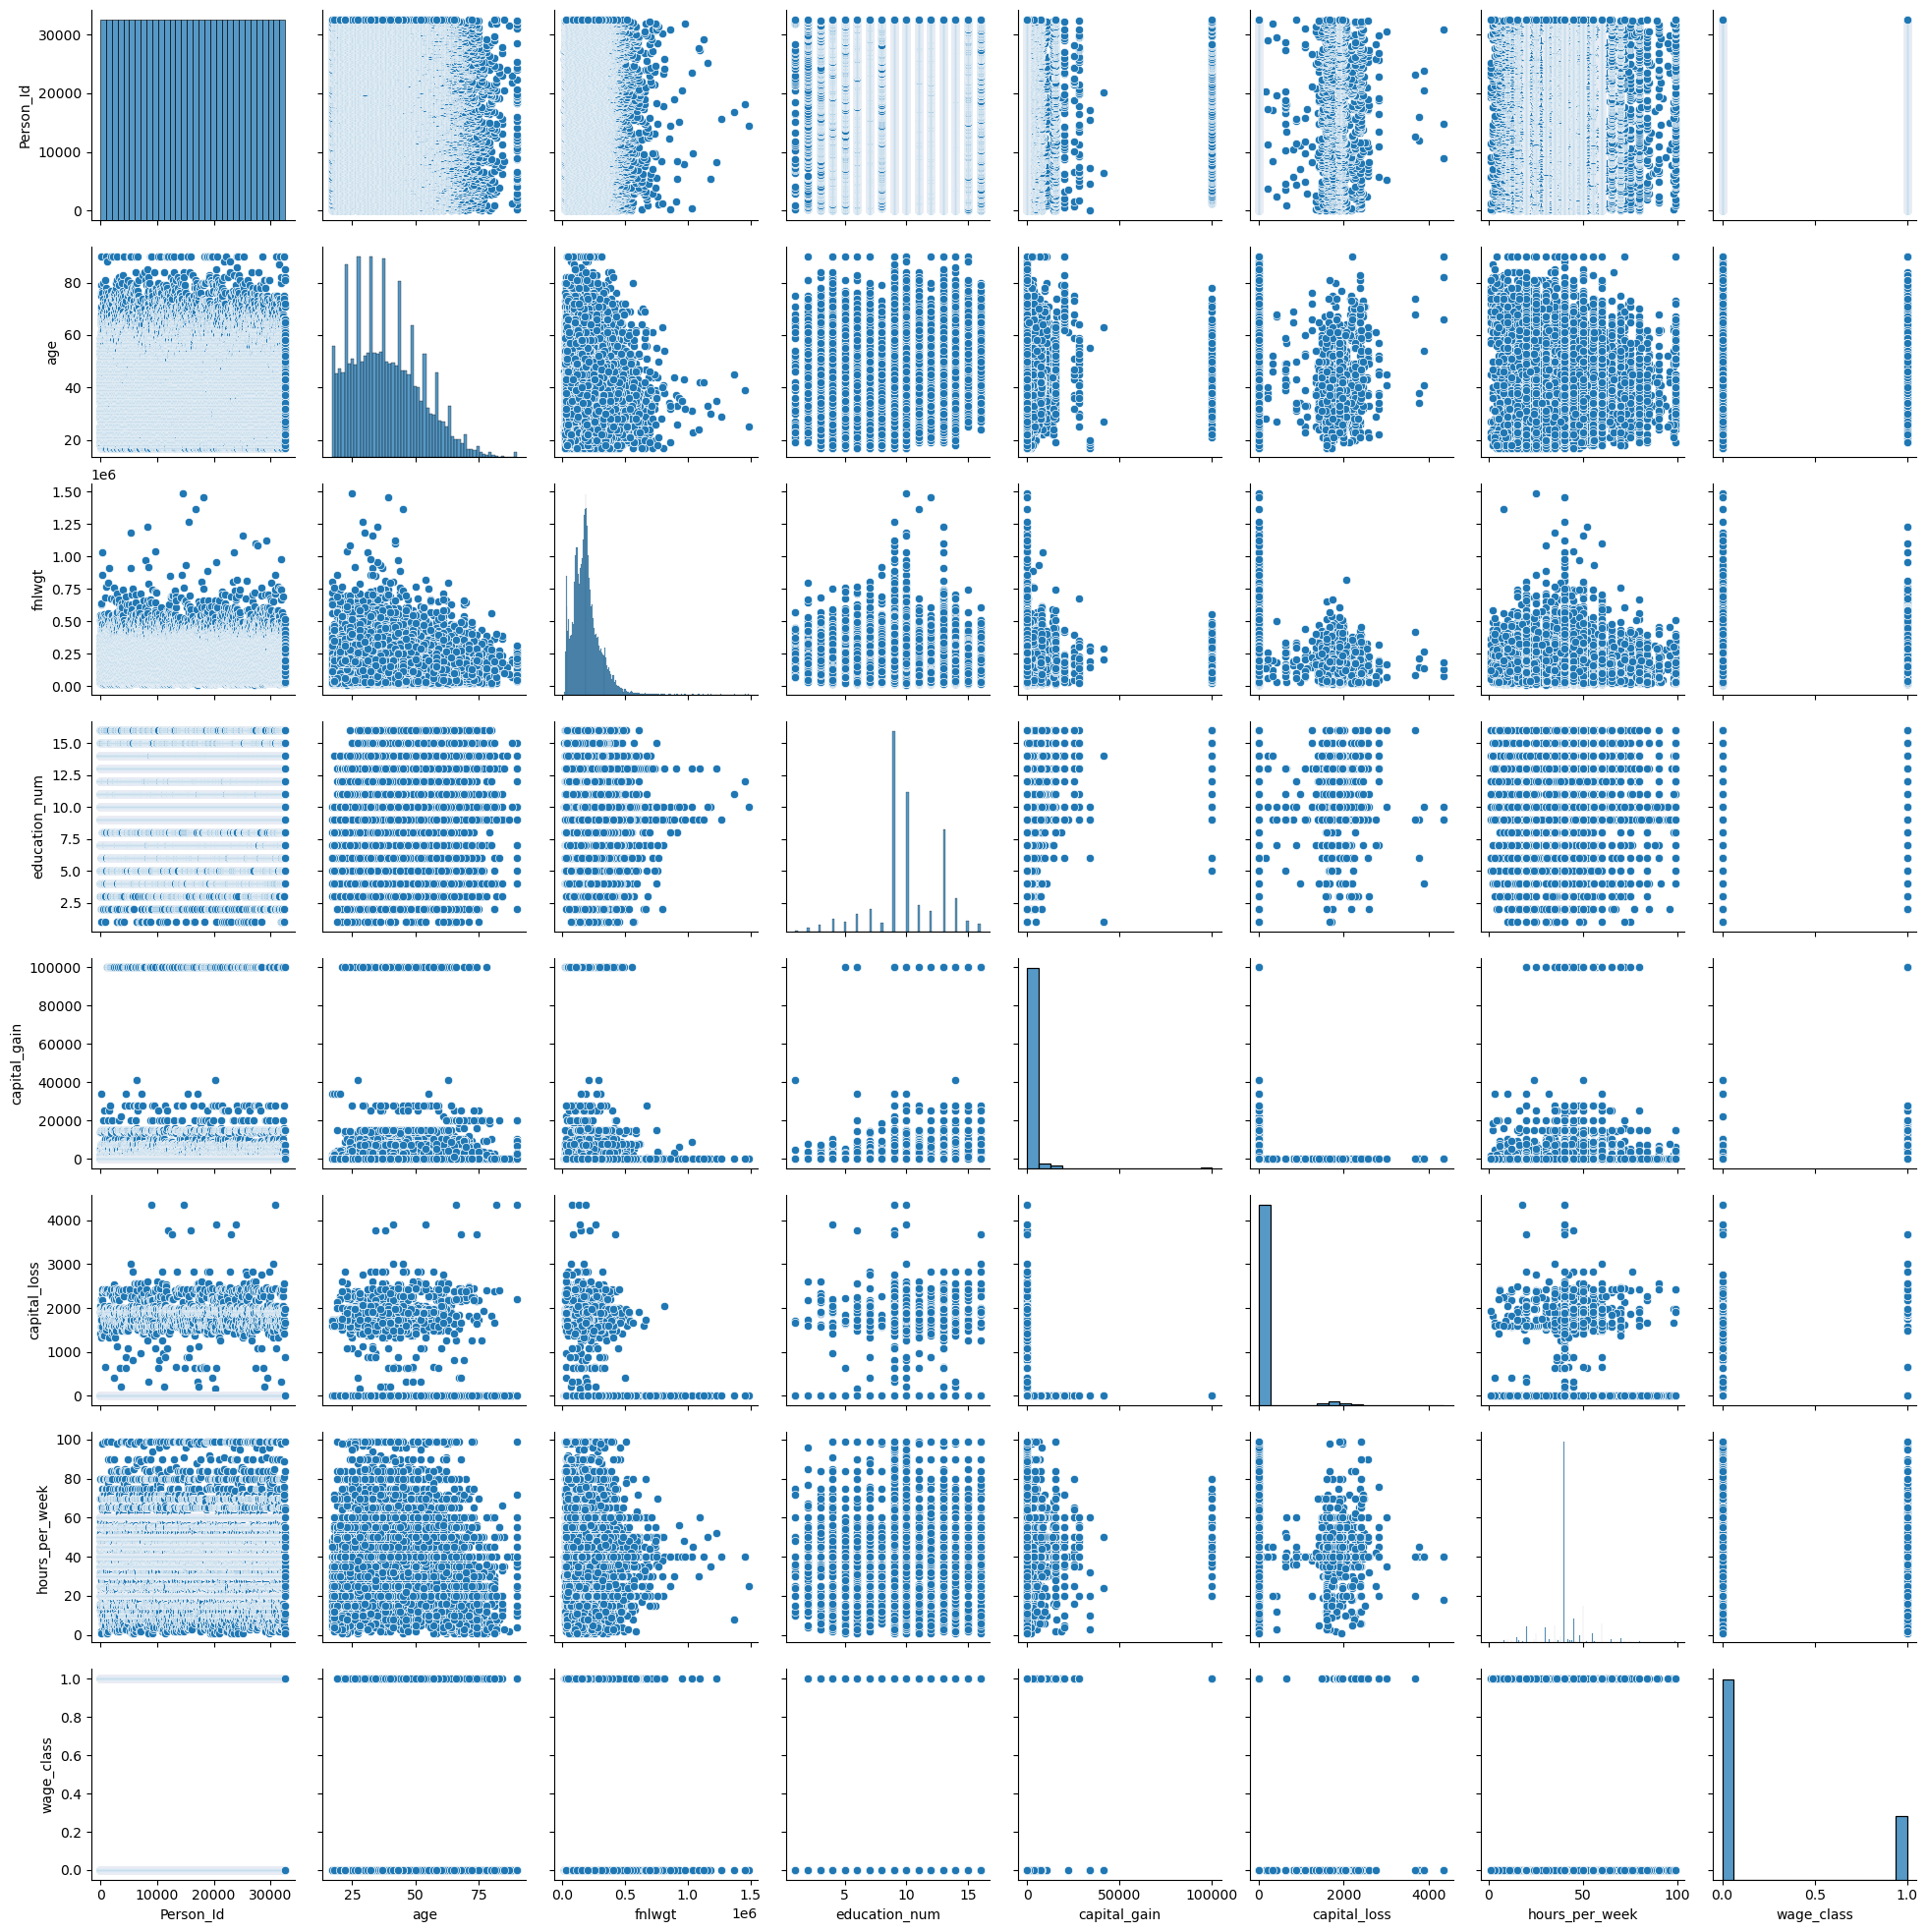

In [521]:
## pairplot
sns.pairplot(df)

### Checking correlation

In [522]:
df.corr()

,Person_Id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
Person_Id,1.000000,0.001286,-0.003153,-0.001079,0.001672,-0.001188,0.000607,0.005404
age,0.001286,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.003153,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,-0.001079,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.001672,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,-0.001188,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.000607,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
wage_class,0.005404,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

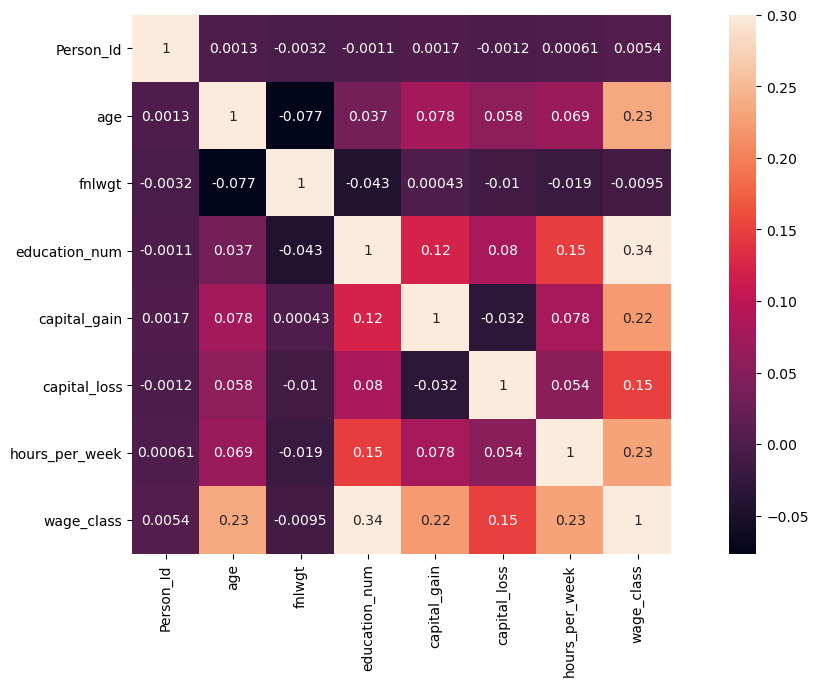

In [523]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),vmax=.3, square=True,annot=True)

#### Observation

**From the correlation heatmap, we can see that the dependent feature 'wage_class' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.**

# Data Preprocessing Part

### Handling "?" value in data

In [524]:
round((df.isin(['?']).sum()/df.shape[0])*100,2).astype(str)+' %'

Person_Id          0.0 %
age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.79 %
wage_class         0.0 %
dtype: object

In [525]:
columns=["workclass","native_country","occupation"]
for col in columns:
    df[col]=df[col].replace("?",df[col].mode()[0])

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Person_Id       32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  wage_class      32561 non-null  int32 
dtypes: int32(1), int64(7), object(8)
memory usage: 3.9+ MB


In [527]:
round((df.isin(['?']).sum()/df.shape[0])*100,2).astype(str)+' %'

Person_Id         0.0 %
age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
wage_class        0.0 %
dtype: object

### Label Encoding

In [528]:
df.columns

Index(['Person_Id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [529]:
from sklearn.preprocessing import LabelEncoder

cols_encode = ["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]

for col in cols_encode:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [530]:
list(encoder.inverse_transform([0, 1, 2, 3]))

['Cambodia', 'Canada', 'China', 'Columbia']

## Feature Selection

In [531]:
X = df.drop('wage_class', axis=1)
Y = df['wage_class']

#### Building the extra tree to computing the individual feature importance

In [532]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(random_state=42)

In [533]:
# Training the model
extra_tree_forest.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [534]:
# Computing the importance

important = extra_tree_forest.feature_importances_

importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

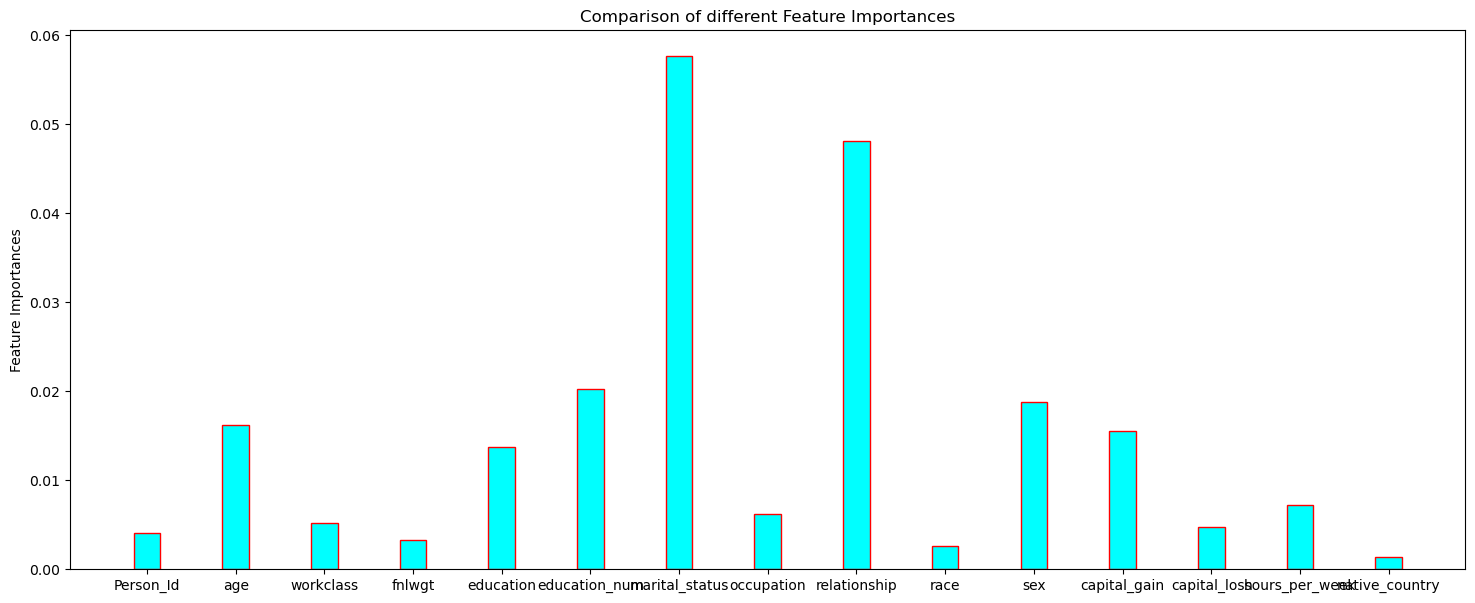

In [535]:
plt.figure(figsize = (18,7))
plt.bar(X.columns, importance_normalized, width= 0.3, align='center',color='cyan', edgecolor = 'red')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

#### Droping the less importance feature columns

In [536]:
X = X.drop(['Person_Id','workclass', 'education', 'race', 'sex',
            'capital_loss', 'native_country', 'fnlwgt'], axis=1)

#### Feature scaling

In [537]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset using Oversampling

In [538]:
Y.value_counts()

0    24720
1     7841
Name: wage_class, dtype: int64

In [539]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: wage_class, dtype: object

In [540]:
# Installing imblearn Library

!pip install imblearn

In [541]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [542]:
#getting the new X and Y

X_new,Y_new = ros.fit_resample(X,Y)

In [543]:
Y_new.value_counts()

1    24720
0    24720
Name: wage_class, dtype: int64

In [544]:
round(Y_new.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: wage_class, dtype: object

### Creating a train test split

In [545]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_new, Y_new, test_size=0.2, random_state=42)

In [546]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 7)
X_test shape: (9888, 7)
Y_train shape: (39552,)
Y_test shape: (9888,)


# Model Building

### Logistic Regression

In [547]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import time

reg = LogisticRegression(random_state=42)

In [548]:
#training the model
reg.fit(X_train, Y_train)
prediction_reg = reg.predict(X_test)

In [549]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, prediction_reg), 3))
print('F1 score:', round(f1_score(Y_test, prediction_reg), 3))

Logistic Regression:
Accuracy score: 0.808
F1 score: 0.817


### KNN Classifier

In [550]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [551]:
#For calculating execution time
start_time = time.time()

# Training
knn.fit(X_train, Y_train)
prediction_knn = knn.predict(X_test)

end = time.time()

In [552]:
# Evaluation part of

print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, prediction_knn) , 2))
print('F1 score:', round(f1_score(Y_test, prediction_knn) , 2))
print('Time Taken: %.2f sec' %(end - start_time))

Naive Bayes Classifier:
Accuracy score: 0.84
F1 score: 0.85
Time Taken: 1.80 sec


### Naive Bayes Classifier

In [553]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#For calculating execution time
start_time = time.time()

nb.fit(X_train, Y_train)
prediction_nb = nb.predict(X_test)

end = time.time()

In [554]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, prediction_nb), 3))
print('F1 score:', round(f1_score(Y_test, prediction_nb) , 3))
print('Time Taken: %.2f sec' %(end - start_time))

Naive Bayes Classifier:
Accuracy score: 0.699
F1 score: 0.597
Time Taken: 0.02 sec


### Decision Tree Classifier

In [555]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=42)

start_time = time.time()

decision.fit(X_train, Y_train)
prediction_DT = decision.predict(X_test)

end = time.time()

In [556]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, prediction_DT), 3))
print('F1 score:', round(f1_score(Y_test, prediction_DT), 3))
print('Time Taken: %.2f sec' %(end - start_time))

Decision Tree Classifier:
Accuracy score: 0.883
F1 score: 0.89
Time Taken: 0.09 sec


### Random Forest Classifier

In [557]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)

start_time = time.time()

RF.fit(X_train, Y_train)
prediction_RF = RF.predict(X_test)

end = time.time()

In [558]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, prediction_RF), 3))
print('F1 score:', round(f1_score(Y_test, prediction_RF), 3))
print('Time Taken: %.2f sec' %(end - start_time))

Random Forest Classifier:
Accuracy score: 0.897
F1 score: 0.902
Time Taken: 2.79 sec


### XGB Classifier

In [559]:
# Installing xgboost

!pip install xgboost

In [560]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=400,learning_rate=0.2,max_depth=3)

start_time = time.time()

xgb.fit(X_train, Y_train)
prediction_xgb = xgb.predict(X_test)

end = time.time()

[18:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [561]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, prediction_xgb), 3))
print('F1 score:', round(f1_score(Y_test, prediction_xgb), 3))
print('Time Taken: %.2f sec' %(end - start_time))

XGB Classifier:
Accuracy score: 0.842
F1 score: 0.849
Time Taken: 1.03 sec


### Model Selectition and Evaluation

**From above Model, we can see Random Forest Classifier has the highest accuracy. In the case of a random forest, Hyperparameter tuning not be necessary, as random forests are already very good at classification and also it time consuming.**

#### Checking precision, recall, F1 score

In [562]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

print(classification_report(Y_test,prediction_RF))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      4938
           1       0.86      0.95      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



### Checking confusion matrix

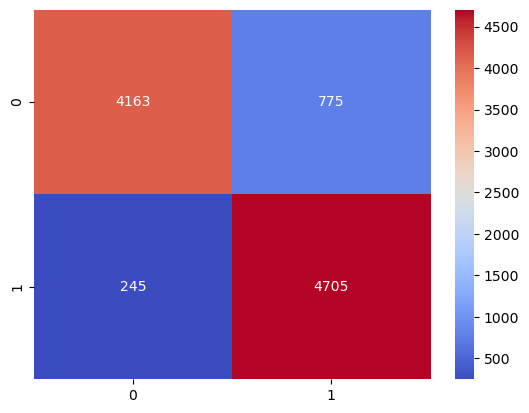

In [563]:
cm = confusion_matrix(Y_test, prediction_RF)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.show()

### Checking the AUC Score

In [564]:
predicted_probabilities = RF.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test,  predicted_probabilities[:,1])

auc = roc_auc_score(Y_test,predicted_probabilities[:,1])

print(f'Test AUC score is : {round(auc,3)}')

Test AUC score is : 0.954


### Ploting the AUC curve

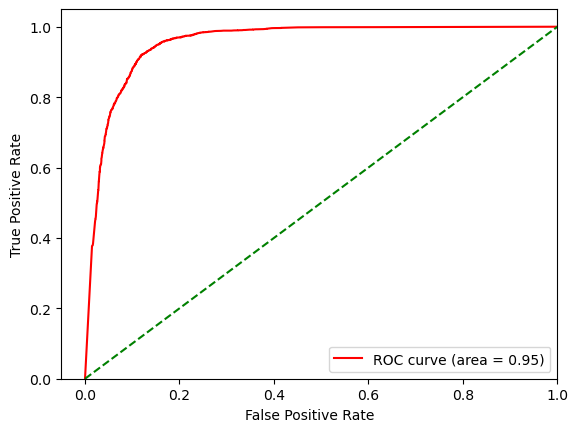

In [565]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()

### Testing our model on Test.csv

In [566]:
test = pd.read_csv("test.csv")
sub = pd.read_csv("submission.csv")
test.head()

,Person_Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,32562,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,32563,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,32564,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,32565,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,32566,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


##### Removing the " ?" value from dataset

In [567]:
columns=["occupation"]
for col in columns:
    test[col]=test[col].replace(" ?",test[col].mode()[0])

##### Dropping the unnecessary columns which our model does not require

In [568]:
test.drop(['Person_Id','workclass', 'education', 'race', 'sex',
            'capital_loss', 'native_country', 'fnlwgt'], axis=1, inplace = True)

##### Encoding the categorical columns

In [569]:
from sklearn.preprocessing import LabelEncoder

test_cols_encode = ["marital_status","occupation","relationship"]

for col in test_cols_encode:
    encoder = LabelEncoder()
    test[col] = encoder.fit_transform(test[col])

##### Prediction with our model test dataset

In [570]:
#prediction on test.csv file

s_predict = RF.predict(test)

In [571]:
#checking the data of sample submission.csv file
sub.head()

,Person_Id,wage_class
0,32562,<=50K
1,32563,<=50K
2,32564,<=50K
3,32565,<=50K
4,32566,<=50K


##### To create a submission we  need to construct a dataframe containing just the Person_id from the test set and our prediction.

In [572]:
id_col = sub["Person_Id"]
submission_df_1 = pd.DataFrame({
                  "Person_id": id_col, 
                  "wage_class": s_predict})
for val in submission_df_1["wage_class"]:
    if(val == 0):
        submission_df_1["wage_class"]=submission_df_1["wage_class"].replace(0," <=50K")
    else:
        submission_df_1["wage_class"]=submission_df_1["wage_class"].replace(1," >50K")

##### checking the result

In [573]:
submission_df_1.head()

,Person_id,wage_class
0,32562,<=50K
1,32563,<=50K
2,32564,<=50K
3,32565,>50K
4,32566,<=50K


#### Exporting the Submission_1.csv File

In [574]:
submission_df_1.to_csv('submission_1.csv', index=False)

# Deployment of Model using Streamlit

In [575]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(RF, pickle_out)
pickle_out.close()